<a href="https://colab.research.google.com/github/ChardyBalla/Chardy/blob/main/Refocus_Data_Visualization_with_Python_HA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EXERCISES

Answer to the following questions with matplotlib. Add chart titles and axis labels to all visualizations.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Let's load and analyze the diet dataset

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Refocus Module/Jupyter Notebook-20230501T012835Z-001/Jupyter Notebook/datasets/Diet.csv')
df.head()

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
0,25,,41,171,60,2,60.0
1,26,,32,174,103,2,103.0
2,1,0,22,159,58,1,54.2
3,2,0,46,192,60,1,54.0
4,3,0,55,170,64,1,63.3


### In the following Problems, the solution is already laid out for you. Fill in the missing values (denoted by blanks) to solve each item

**Problem 1:** Using a vertical bar chart, show the average weight (pre.weight vs. weight6weeks) for each diet type. Transfer the legend in the lower left corner.

In [ ]:
# Solution 1: Bar Chart
df_weight_per_diet = df.groupby('Diet')[[_______, _________]].______()    # get the average weight (pre.weight vs. weight6weeks) for each diet type

df_weight_per_diet.plot(kind=______)
plt.title('Weight Change per Diet Type')
plt.ylabel('Weight')
plt.xlabel('Diet Type')
plt.xticks(rotation=0)
plt.legend(_____=______)    # legend in the lower left corner

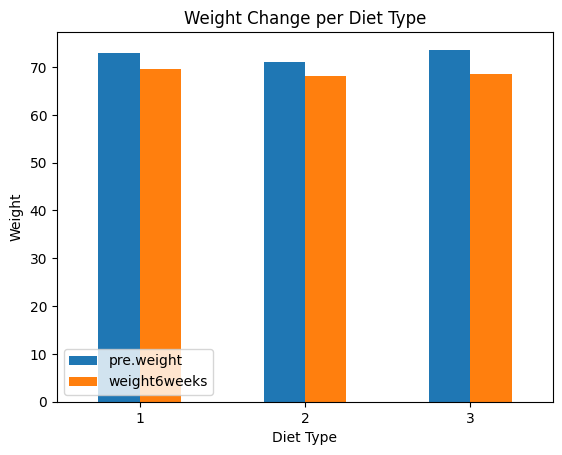

In [8]:
# Solution 1: Bar Chart

df_weight_per_diet = df.groupby('Diet')[['pre.weight', 'weight6weeks']].mean()  # get the average weight (pre.weight vs. weight6weeks) for each diet type

ax = df_weight_per_diet.plot(kind='bar')
plt.title('Weight Change per Diet Type')
plt.ylabel('Weight')
plt.xlabel('Diet Type')
plt.xticks(rotation=0)
plt.legend(loc='lower left')

**Problem 2:** In separate horizontal bar charts for males (gender=1) and females (gender=0), show the average change in weight (pre.weight vs. weight6weeks) per diet type.

Hint: ax is a parameter in df.plot -> set ax=ax[0] or ax=ax[1]

Text(0.5, 1.0, 'Weight Change per Diet Type for Males')

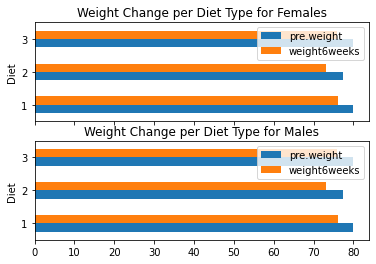

In [ ]:
# Solution 1: Horizontal Bar Chart
# get the average weight (pre.weight vs. weight6weeks) for each diet type for males and females:
df_weight_per_diet_male = df[df.______=='1'].groupby('Diet')[[_______, _________]].______()    # males
df_weight_per_diet_female = df[df.______=='0'].groupby('Diet')[[_______, _________]].______()    # females

fig, ax = plt.______(2, 1, sharex=True)    # subplots
df_weight_per_diet_female._____(kind=_____, ax=_____)    # plot female horizontal barchart
ax[0].set_title('Weight Change per Diet Type for Females')

df_weight_per_diet_male.______(kind=_____, ax=_____)     # plot male horizontal barchart
ax[1].set_title('Weight Change per Diet Type for Males')


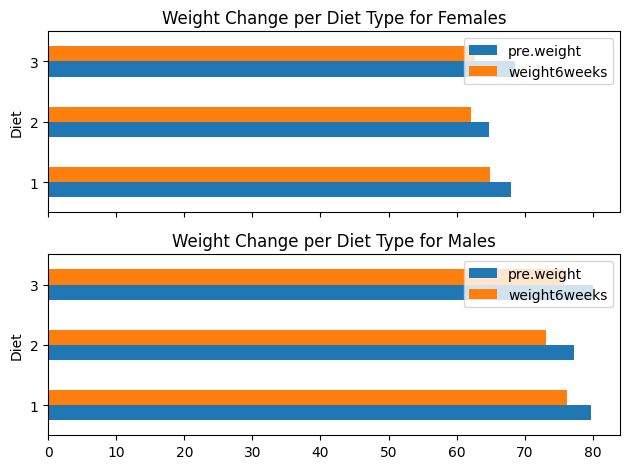

In [14]:
import matplotlib.pyplot as plt

df_weight_per_diet_male = df[df['gender'] =='1'].groupby('Diet')[['pre.weight', 'weight6weeks']].mean()    # males
df_weight_per_diet_female = df[df['gender'] == '0'].groupby('Diet')[['pre.weight', 'weight6weeks']].mean()  # females

fig, ax = plt.subplots(2, 1, sharex=True)    # subplots
df_weight_per_diet_female.plot(kind='barh', ax=ax[0])    # plot female horizontal barchart
ax[0].set_title('Weight Change per Diet Type for Females')

df_weight_per_diet_male.plot(kind='barh', ax=ax[1])     # plot male horizontal barchart
ax[1].set_title('Weight Change per Diet Type for Males')

plt.tight_layout()    # optional, adjust the layout
plt.show()


**Problem 3:** In a scatter plot, show the correlation between Height and pre.weight

Text(0.5, 1.0, 'pre.weight vs. Height')

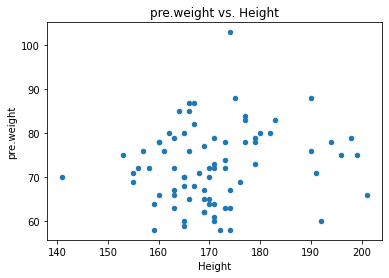

In [ ]:
# solution 1: scatter plot

_____.plot(kind=______, x='Height', y='pre.weight')    # scatter plot on height vs pre.weight
plt.title('pre.weight vs. Height')

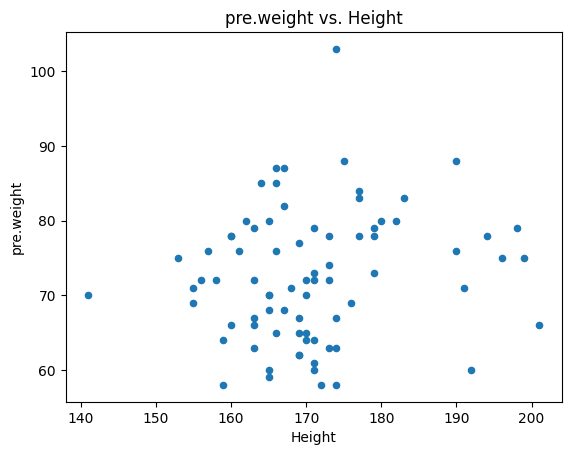

In [15]:
df.plot(kind='scatter', x='Height', y='pre.weight')
plt.title('pre.weight vs. Height')

plt.show()


**Problem 4:** Using a stacked bar chart, show the change in weight for each gender (don't include blank gender). Transfer the legend in the lower left corner

Hint: add a weight_change column and plot it with weight6weeks.

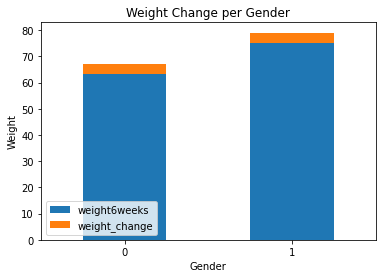

In [ ]:
# Solution 1: stacked bar chart

# add a weight change column
df['weight_change'] = _________ - ___________
valid_genders = df[df.______.isin(['1', '0'])]    # don't include blank gender
df_weight_per_gender = valid_genders._______('gender')[['weight6weeks', 'weight_change']]._____()    # get average weights per gender

df_weight_per_gender.plot(kind='bar', _____=_____)    # stacked bar chart
plt.title('Weight Change per Gender')
plt.ylabel('Weight')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.legend(_____=______)    # legend in the lower left corner

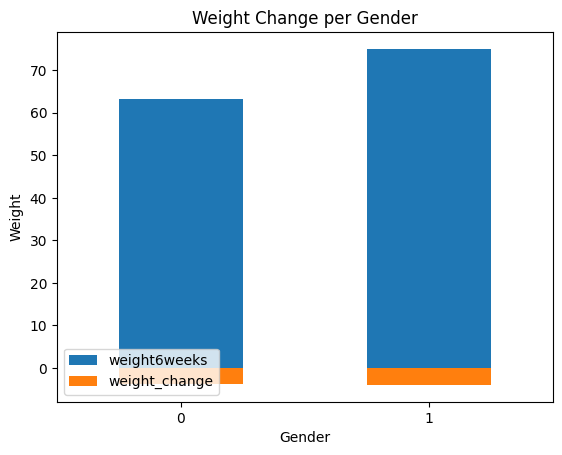

In [22]:
# Add a weight change column
df['weight_change'] = df['weight6weeks'] - df['pre.weight']
valid_genders = df[df['gender'].isin(['1', '0'])]    # don't include blank gender
df_weight_per_gender = valid_genders.groupby('gender')[['weight6weeks', 'weight_change']].mean()    # Get average weights per gender

df_weight_per_gender.plot(kind='bar', stacked=True)    # Stacked bar chart
plt.title('Weight Change per Gender')
plt.ylabel('Weight')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.legend(loc='lower left') # legend in the lower left corner

**Problem 5:** Using a line chart, show the counts of each people with the same age. Sort the index by Age. Add triangle markers and color them red.

Text(0.5, 0, 'Age')

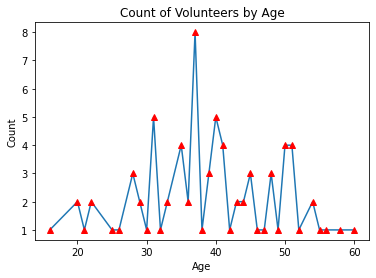

In [ ]:
age_count_df = df.Age._______()    # counts of people per age
sorted_age_df = age_count_df._______()    # sort the index by age
sorted_age_df.plot(marker=____, __________='red', _________='red')    # line chart with red triangle markers
plt.title('Count of Volunteers by Age')
plt.ylabel('Count')
plt.xlabel('Age')

Text(0.5, 0, 'Age')

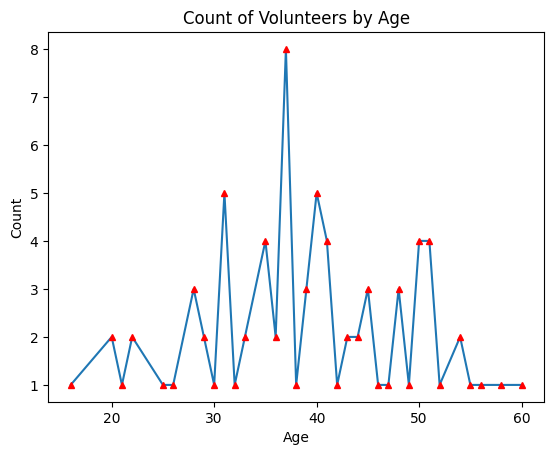

In [32]:
age_count_df = df['Age'].value_counts()  # Counts of people per age
sorted_age_df = age_count_df.sort_index()  # Sort the index by age

sorted_age_df.plot(marker='^', markerfacecolor='red', markeredgecolor='red', linestyle='-', markersize=4)  # Line chart with red triangle markers
plt.title('Count of Volunteers by Age')
plt.ylabel('Count')
plt.xlabel('Age')
